In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import chardet

# Detect encoding
with open('Rotten_Tomatoes_Movies3.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result)


{'encoding': 'MacRoman', 'confidence': 0.713549564412243, 'language': ''}


In [4]:
data = pd.read_csv('Rotten_Tomatoes_Movies3.csv', encoding='latin1')  # Replace 'latin1' with the detected encoding

In [7]:
# Display the first few rows of the dataset
print(data.head())

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                                                NaN      R   
3  Sidney Lumet's feature debut is a superbly wri...     NR   
4  One of D

In [8]:
# Define features and target variable
X = data.drop(columns=['audience_rating'])  # Replace 'audience_rating' with the correct column name
y = data['audience_rating']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

In [11]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [12]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [13]:
# Combine preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [14]:
# Define the model
model = RandomForestClassifier(random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

In [16]:
print(y_train.isnull().sum())  # Check how many missing values are in y_train

199


In [17]:
non_nan_indices = ~y_train.isnull()
X_train = X_train[non_nan_indices]
y_train = y_train[non_nan_indices]

In [18]:
y_train = y_train.fillna(y_train.mean())  # Replace NaN with mean

In [19]:
y_train = y_train.fillna(y_train.mode()[0])  # Replace NaN with the mode

In [20]:
print(y_train.isnull().sum())  # Should output 0

0


In [21]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'studio_name', 'tomatometer_status'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [22]:
# Drop rows with NaN in y_train
non_nan_indices = ~y_train.isnull()
X_train = X_train[non_nan_indices]
y_train = y_train[non_nan_indices]

# Verify
print(y_train.isnull().sum())  # Should be 0

# Train the pipeline
pipeline.fit(X_train, y_train)

0


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'studio_name', 'tomatometer_status'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [23]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

In [25]:
print(y_test.isnull().sum())  # Check how many NaNs are in y_test

53


In [26]:
valid_indices = ~y_test.isnull()
y_test = y_test[valid_indices]
y_pred = y_pred[valid_indices]

In [27]:
y_test = y_test.fillna(y_test.mode()[0])  # Replace NaN with the most frequent class

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.03


In [29]:
# Check and handle NaNs in y_test
print("Missing values in y_test before cleanup:", y_test.isnull().sum())

# Remove rows with NaN in y_test and corresponding predictions
valid_indices = ~y_test.isnull()
y_test = y_test[valid_indices]
y_pred = y_pred[valid_indices]

# Validate again
print("Missing values in y_test after cleanup:", y_test.isnull().sum())

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Missing values in y_test before cleanup: 0
Missing values in y_test after cleanup: 0
Accuracy: 0.03


In [30]:
# Validate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.03
Classification Report:
              precision    recall  f1-score   support

         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         3
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         3
        11.0       0.00      0.00      0.00         2
        12.0       0.00      0.00      0.00         5
        13.0       0.00      0.00      0.00         2
        14.0       0.00      0.00      0.00         7
        15.0       0.00      0.00      0.00         8
        16.0       0.00      0.00      0.00        11
        17.0       0.00      0.00      0.00         7
        18.0       0.00      0.00      0.00        15
        19.0       0.00      0.00      0.00        16
        20.0       0.00      0.00      0.00        10
        21.0       0.00      0.00      0.00        14
        22.0       0.00      0.00      0.00        21
        23.0       0.07      0.06      0.06

C:\Users\SAGNIK DAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAGNIK DAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAGNIK DAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [31]:
print("Unique values in y_test:", y_test.unique())
print("Unique values in y_pred:", np.unique(y_pred))

Unique values in y_test: [ 44.  41.  72.  87.  90.  64.  39.  92.  56.  46.  36.  67.  53.  83.
  29.  48.  69.  27.  78.  37.  62.  42.  25.  68.  91.  49.  31.  80.
  34.  54.  19.  74.  55.  94.  61.  40.  50.  43.  85.  21.  52.  73.
  89.  71.  79.  57.  18.  35.  24.  97.  38.  88.  45.  65.  63.  60.
  47.  58.  23.  75.  96.  51.  84.  33.  81.  59.  86.   8.  30.  76.
  82.  17.  26.  15.  70.  77.  20.  11.  12.  66.  28.  16.  10.  32.
  13.  22.  14. 100.  93.  98.  99.  95.   7.   9.]
Unique values in y_pred: [ 9. 14. 15. 16. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.
 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.
 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67.
 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85.
 86. 87. 88. 89. 90. 91. 92. 93. 94. 95. 96.]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         3
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         3
        11.0       0.00      0.00      0.00         2
        12.0       0.00      0.00      0.00         5
        13.0       0.00      0.00      0.00         2
        14.0       0.00      0.00      0.00         7
        15.0       0.00      0.00      0.00         8
        16.0       0.00      0.00      0.00        11
        17.0       0.00      0.00      0.00         7
        18.0       0.00      0.00      0.00        15
        19.0       0.00      0.00      0.00        16
        20.0       0.00      0.00      0.00        10
        21.0       0.00      0.00      0.00        14
        22.0       0.00      0.00      0.00        21
        23.0       0.07      0.06      0.06        17
        24.0       0.00    

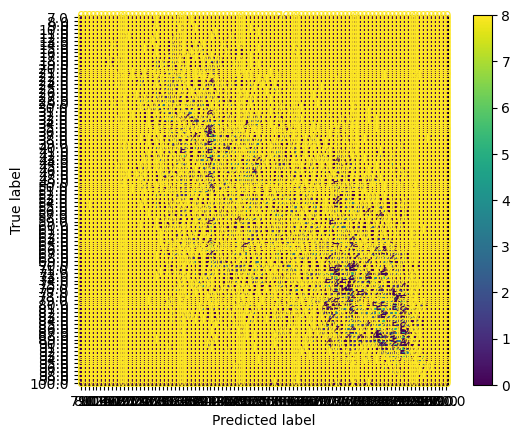

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(class_weight="balanced")

Classification Report:
              precision    recall  f1-score   support

         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         3
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         3
        11.0       0.00      0.00      0.00         2
        12.0       0.00      0.00      0.00         5
        13.0       0.00      0.00      0.00         2
        14.0       0.00      0.00      0.00         7
        15.0       0.00      0.00      0.00         8
        16.0       0.00      0.00      0.00        11
        17.0       0.00      0.00      0.00         7
        18.0       0.00      0.00      0.00        15
        19.0       0.00      0.00      0.00        16
        20.0       0.00      0.00      0.00        10
        21.0       0.00      0.00      0.00        14
        22.0       0.00      0.00      0.00        21
        23.0       0.07      0.06      0.06        17
    

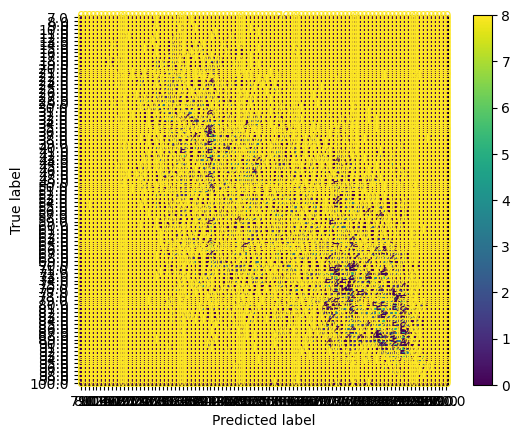

In [39]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Classification report with zero_division=0
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix to visualize predictions
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)